In [1]:
import folium
import geopandas as gpd
import networkx as nx
import numpy as np
import pandas as pd
from folium import Choropleth, Marker
from folium.plugins import HeatMap, MarkerCluster
from matplotlib import pyplot as plt

In [2]:
conflicts_file_path = "../Dados/Ukraine_conflicts.csv"

df_conflicts = pd.read_csv(conflicts_file_path)

display(df_conflicts)

data_id  iso event_id_cnty  event_id_no_cnty    event_date  year  \
0      9415087  804      UKR64033             64033  15 July 2022  2022   
1      9415107  804      UKR63274             63274  15 July 2022  2022   
2      9415126  804      UKR63181             63181  15 July 2022  2022   
3      9415131  804      UKR63344             63344  15 July 2022  2022   
4      9415142  804      UKR63275             63275  15 July 2022  2022   
...        ...  ...           ...               ...           ...   ...   
39386  9092833  804      UKR23175             23175  16 July 2019  2019   
39387  9092834  804      UKR23176             23176  16 July 2019  2019   
39388  9092835  804      UKR23560             23560  16 July 2019  2019   
39389  9175245  804      UKR23178             23178  16 July 2019  2019   
39390  9175246  804      UKR23182             23182  16 July 2019  2019   

       time_precision                  event_type  \
0                   1  Explosions/Remote violence   
1                   1      Strategic developments   
2                   1  Explosions/Remote violence   
3                   1  Explosions/Remote violence   
4                   1      Strategic developments   
...               ...                         ...   
39386               1  Violence against civilians   
39387               1                    Protests   
39388               1                    Protests   
39389               1                     Battles   
39390               1  Explosions/Remote violence   

                          sub_event_type  \
0      Shelling/artillery/missile attack   
1                  Disrupted weapons use   
2                       Air/drone strike   
3      Shelling/artillery/missile attack   
4                  Disrupted weapons use   
...                                  ...   
39386                             Attack   
39387                   Peaceful protest   
39388                   Peaceful protest   
39389                        Armed clash   
39390  Shelling/artillery/missile attack   

                                            actor1  ...  \
0               Military Forces of Ukraine (2019-)  ...   
1               Military Forces of Ukraine (2019-)  ...   
2      Military Forces of Russia (2000-) Air Force  ...   
3                Military Forces of Russia (2000-)  ...   
4               Military Forces of Ukraine (2019-)  ...   
...                                            ...  ...   
39386       Military Forces of Ukraine (2014-2019)  ...   
39387                         Protesters (Ukraine)  ...   
39388                         Protesters (Ukraine)  ...   
39389      NAF: United Armed Forces of Novorossiya  ...   
39390      NAF: United Armed Forces of Novorossiya  ...   

                     location  latitude longitude geo_precision  \
0                   Melitopol   46.8489   35.3653             1   
1                Bila Tserkva   49.8094   30.1121             2   
2                      Dnipro   48.4593   35.0386             1   
3                   Slovyansk   48.8533   37.6065             1   
4                       Odesa   46.4639   30.7386             3   
...                       ...       ...       ...           ...   
39386                   Odesa   46.4639   30.7386             1   
39387  Kyiv - Shevchenkivskyi   50.4646   30.4655             1   
39388                   Odesa   46.4639   30.7386             1   
39389            Novotroitske   47.7158   37.5919             2   
39390              Mykolaivka   47.6539   37.6793             2   

                                                  source    source_scale  \
0                                                 061.ua     Subnational   
1                                             24 Channel        National   
2                                             24 Channel        National   
3                                             24 Channel        National   
4                                             

In [3]:
def string_list_sep(string_list: list) -> list: 
    """
    Função auxiliar para separar dar espaço em strings na lista
    """
    string_sep = lambda x: x.replace(' ', '\n').replace('/', '/\n')
    
    return list(map(string_sep, string_list))

In [4]:
def graph_generator(G: nx.Graph, pos: dict, n_events: int, n_subevents: int):
    ...

In [5]:
attrs = ['event_date', 'year', 'event_type', 'sub_event_type', 'fatalities', 'location', 'latitude', 'longitude']

df_conflicts_2022 = df_conflicts[df_conflicts['year'] >= 2022]

df_conflicts_2022 = df_conflicts_2022[attrs]

display(df_conflicts_2022)

event_date  year                  event_type  \
0         15 July 2022  2022  Explosions/Remote violence   
1         15 July 2022  2022      Strategic developments   
2         15 July 2022  2022  Explosions/Remote violence   
3         15 July 2022  2022  Explosions/Remote violence   
4         15 July 2022  2022      Strategic developments   
...                ...   ...                         ...   
13450  01 January 2022  2022                    Protests   
13451  01 January 2022  2022                    Protests   
13452  01 January 2022  2022                    Protests   
13453  01 January 2022  2022                    Protests   
13454  01 January 2022  2022  Explosions/Remote violence   

                          sub_event_type  fatalities      location  latitude  \
0      Shelling/artillery/missile attack           0     Melitopol   46.8489   
1                  Disrupted weapons use           0  Bila Tserkva   49.8094   
2                       Air/drone strike           0        Dnipro   48.4593   
3      Shelling/artillery/missile attack           1     Slovyansk   48.8533   
4                  Disrupted weapons use           0         Odesa   46.4639   
...                                  ...         ...           ...       ...   
13450                   Peaceful protest           0    Kryvyi Rih   47.9093   
13451                   Peaceful protest           0          Lviv   49.8407   
13452                   Peaceful protest           0          Kyiv   50.4496   
13453                   Peaceful protest           0         Odesa   46.4639   
13454  Shelling/artillery/missile attack           0         Styla   47.6936   

       longitude  
0        35.3653  
1        30.1121  
2        35.0386  
3        37.6065  
4        30.7386  
...          ...  
13450    33.3933  
13451    24.0305  
13452    30.5224  
13453    30.7386  
13454    37.8375  

[13455 rows x 8 columns]

In [6]:
df_subevent_type = df_conflicts_2022.groupby(['event_type', 'sub_event_type'])[['fatalities']].sum().reset_index()

display(df_subevent_type)

event_type                       sub_event_type  \
0                      Battles                          Armed clash   
1                      Battles         Government regains territory   
2                      Battles  Non-state actor overtakes territory   
3   Explosions/Remote violence                     Air/drone strike   
4   Explosions/Remote violence                              Grenade   
5   Explosions/Remote violence        Remote explosive/landmine/IED   
6   Explosions/Remote violence    Shelling/artillery/missile attack   
7                     Protests   Excessive force against protesters   
8                     Protests                     Peaceful protest   
9                     Protests            Protest with intervention   
10                       Riots                         Mob violence   
11                       Riots                Violent demonstration   
12      Strategic developments                            Agreement   
13      Strategic developments                              Arrests   
14      Strategic developments             Change to group/activity   
15      Strategic developments                Disrupted weapons use   
16      Strategic developments     Headquarters or base established   
17      Strategic developments         Looting/property destruction   
18      Strategic developments    Non-violent transfer of territory   
19      Strategic developments                                Other   
20  Violence against civilians       Abduction/forced disappearance   
21  Violence against civilians                               Attack   
22  Violence against civilians                      Sexual violence   

    fatalities  
0         5580  
1           56  
2           44  
3         1533  
4            6  
5           96  
6         3277  
7            4  
8            0  
9            0  
10           0  
11           0  
12           0  
13           0  
14           0  
15           0  
16           0  
17           0  
18           0  
19           0  
20           0  
21         966  
22           5

In [7]:
df_event_type = df_subevent_type.groupby('event_type')[['fatalities']].sum().reset_index()

display(df_event_type)

event_type  fatalities
0                     Battles        5680
1  Explosions/Remote violence        4912
2                    Protests           4
3                       Riots           0
4      Strategic developments           0
5  Violence against civilians         971

In [8]:
aux_subevent_fatal = df_subevent_type[df_subevent_type['fatalities'] > 0]
aux_event_fatal = df_event_type[df_event_type['fatalities'] > 0]

events_list = string_list_sep(aux_event_fatal.event_type.tolist())
fatal_per_event_list = aux_event_fatal.fatalities.tolist()

events_fromsub_list = string_list_sep(aux_subevent_fatal.event_type.tolist())
subevents_list = string_list_sep(aux_subevent_fatal.sub_event_type.tolist())
fatal_per_subevent_list = aux_subevent_fatal.fatalities.tolist()

In [9]:
fatalities_graph = nx.Graph()

n_subevents = len(subevents_list)
n_events = len(events_list)

root = "Ukraine Fatalities\nin 2022"

pos = {root: (n_subevents//2, 6)}

In [10]:
for i in range(n_subevents):
    node = events_fromsub_list[i]
    leaf = subevents_list[i]
    
    fatalities_graph.add_edge(node, leaf, weight = fatal_per_subevent_list[i])
    
    pos[leaf] = (i, 1 - i%(n_events - 1))

for i in range(n_events):
    node = events_list[i]
    
    fatalities_graph.add_edge(root, node, weight = fatal_per_event_list[i])
    
    pos[node] = (i*2 + n_subevents//n_events, 4 - i%2)

Graph info: Graph with 15 nodes and 14 edges


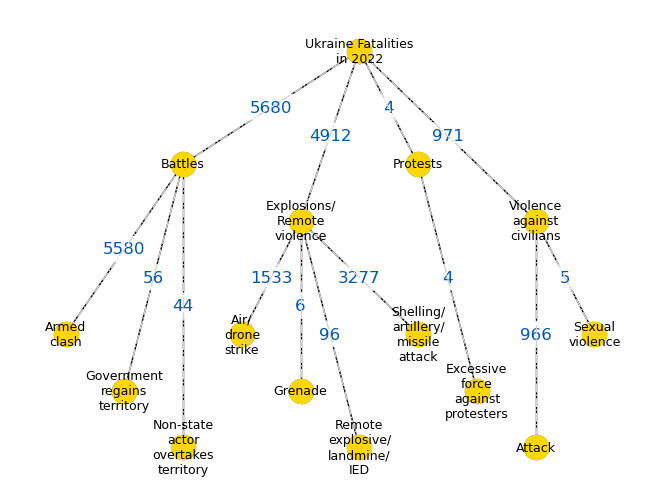

In [11]:
nx.draw(fatalities_graph, pos = pos, with_labels = True, font_size = 9)

nx.draw_networkx_edge_labels(fatalities_graph, 
                             pos = pos, 
                             edge_labels = nx.get_edge_attributes(fatalities_graph, 'weight'), 
                             rotate = False, 
                             font_size = 12,
                             font_color = '#0057b7',
                             alpha = 1
                            )

nx.draw_networkx_nodes(fatalities_graph, 
                       pos = pos,
                       node_color = '#ffd700'
                      )

nx.draw_networkx_edges(fatalities_graph, 
                       pos = pos,
                       style = '-.',
                       edge_color = 'LightGray'
                      )

print(f"Graph info: {fatalities_graph}")

In [14]:
df_fatalities_per_area = df_conflicts_2022.groupby(['location', 'latitude', 'longitude'])[['fatalities']].sum()

df_fatalities_per_area = df_fatalities_per_area[df_fatalities_per_area['fatalities'] > 0].reset_index()

display(df_fatalities_per_area)

location  latitude  longitude  fatalities
0      Adamivka   48.9430    37.4481           2
1     Andriivka   47.1761    33.0463          10
2       Antopil   50.5998    26.4405           9
3    Apostolove   47.6600    33.7137           4
4      Avdiivka   48.1394    37.7497          97
..          ...       ...        ...         ...
480    Zolochiv   50.2799    35.9818          23
481      Zolote   48.6926    38.5145          23
482    Zolote-5   48.6719    38.5600           2
483       Zorya   47.2958    37.6081           2
484     Zoryane   48.0355    37.3966           1

[485 rows x 4 columns]

In [33]:
conflict_map = folium.Map(location = [47.8, 31], tiles='cartodbpositron', zoom_start=6)

mc = MarkerCluster()

for idx, row in df_fatalities_per_area.iterrows():
    if not np.isnan(row['latitude']) and not np.isnan(row['longitude']):
        for i in range(row['fatalities']):
            mc.add_child(Marker([row['latitude'], row['longitude']]))

conflict_map.add_child(mc)
        
conflict_map

In [37]:
conflict_map = folium.Map(location = [47.8, 31], tiles='cartodbpositron', zoom_start=6)

mc = MarkerCluster()

for idx, row in df_fatalities_per_area.iterrows():
    if not np.isnan(row['latitude']) and not np.isnan(row['longitude']):
        for i in range(row['fatalities']):
            mc.add_child(Marker([row['latitude'], row['longitude']]))

conflict_map.add_child(mc)
        
HeatMap(data = df_fatalities_per_area[['latitude', 'longitude']], radius = 15).add_to(conflict_map)

conflict_map

In [28]:
df_2022 = df_conflicts[df_conflicts['year'] >= 2022]

df_main_actor = df_2022.groupby(['actor1','actor2'])[['fatalities']].sum()#.reset_index()

df_main_actor = df_main_actor[df_main_actor['fatalities'] > 0].sort_values(by = 'fatalities', ascending = False).reset_index()

display(df_main_actor)

actor1  \
0                  Military Forces of Ukraine (2019-)   
1                   Military Forces of Russia (2000-)   
2                   Military Forces of Russia (2000-)   
3         Military Forces of Russia (2000-) Air Force   
4             NAF: United Armed Forces of Novorossiya   
5         Military Forces of Russia (2000-) Air Force   
6                  Military Forces of Ukraine (2019-)   
7        Military Forces of Ukraine (2019-) Air Force   
8                Melitopol Communal Militia (Ukraine)   
9                   Military Forces of Russia (2000-)   
10                 Military Forces of Ukraine (2019-)   
11                 Military Forces of Ukraine (2019-)   
12                 Unidentified Armed Group (Ukraine)   
13                  Military Forces of Russia (2000-)   
14                 Military Forces of Ukraine (2019-)   
15  Police Forces of Ukraine (2019-) State Border ...   
16             Military Forces of Russia (2000-) Navy   
17                 Military Forces of Ukraine (2019-)   
18  Military Forces of Ukraine (2019-) National Guard   
19                 Military Forces of Ukraine (2019-)   
20                 Unidentified Armed Group (Ukraine)   
21            NAF: United Armed Forces of Novorossiya   
22            NAF: United Armed Forces of Novorossiya   
23                  Military Forces of Russia (2000-)   
24                 Military Forces of Ukraine (2019-)   
25        Military Forces of Russia (2000-) Air Force   
26                   Police Forces of Ukraine (2019-)   
27       Military Forces of Ukraine (2019-) Air Force   
28       Military Forces of Ukraine (2019-) Air Force   
29                  Military Forces of Russia (2000-)   
30  Military Forces of Ukraine (2019-) Special Ope...   
31                       Unidentified Military Forces   
32                  Military Forces of Russia (2000-)   
33                  Military Forces of Russia (2000-)   
34       Military Forces of Ukraine (2019-) Air Force   
35  Military Forces of Ukraine (2019-) Territorial...   
36                  Military Forces of Russia (2000-)   
37                 Unidentified Armed Group (Ukraine)   
38                  Military Forces of Russia (2000-)   
39       Military Forces of Ukraine (2019-) Air Force   
40                               Protesters (Ukraine)   
41                       Unidentified Military Forces   
42                       Unidentified Military Forces   
43  Military Forces of Russia (2000-) Chechen Batt...   
44        Military Forces of Russia (2000-) Air Force   
45                  Military Forces of Russia (2000-)   
46  Military Forces of Russia (2000-) Chechen Batt...   
47                 Kherson Communal Militia (Ukraine)   
48                 Kherson Communal Militia (Ukraine)   
49                 Military Forces of Ukraine (2019-)   
50             Military Forces of Russia (2000-) Navy   
51        Military Forces of Russia (2000-) Air Force   
52                 Unidentified Armed Group (Ukraine)   
53                  Military Forces of Russia (2000-)   
54                  Military Forces of Russia (2000-)   

                                               actor2  fatalities  
0                   Military Forces of Russia (2000-)        3441  
1                                 Civilians (Ukraine)        2641  
2                  Military Forces of Ukraine (2019-)        2401  
3                                 Civilians (Ukraine)         807  
4                  Military Forces of Ukraine (2019-)         581  
5                  Military Forces of Ukraine (2019-)         471  
6             NAF: United Armed Forces of Novorossiya         364  
7                   Military Forces of Russia (2000-)         113  
8                   Military Forces of Russia (2000-)         103  
9   Military Forces of Ukraine (2019-) National Guard          77  
10             Military Forces of Russia (2000-) Navy          67  
11  Military Forces of Russia (2000-) 

In [23]:
print(help(pd.DataFrame.sort_values))

Help on function sort_values in module pandas.core.frame:

sort_values(self, by, axis: 'Axis' = 0, ascending=True, inplace: 'bool' = False, kind: 'str' = 'quicksort', na_position: 'str' = 'last', ignore_index: 'bool' = False, key: 'ValueKeyFunc' = None)
    Sort by the values along either axis.
    
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels.
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match the length of
         the by.
    inplace : bool, default False
         